In [1]:
# pitches shape (1025, 9376)
# RMSE shape (9376,)

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/mounika.k'

In [3]:
# mfcc, pitches, rmse
# 20 + 1025 + 1 

In [4]:
path = '/ssd_scratch/users/mounika.k/chess_features/'

In [6]:
df = pd.read_csv('chess/cleaned_chess_dataset.csv')
df.shape

(8162, 19)

In [7]:
filenames = os.listdir('/ssd_scratch/users/mounika.k/chess_audio/')
fnames = []
for fname in filenames:
    fnames.append(fname[:-4])

In [8]:
scores = list(df[df['videoid'].isin(fnames)]['commentsToViewsRatio'])

Text(0.5, 1.0, 'Distribution of scores')

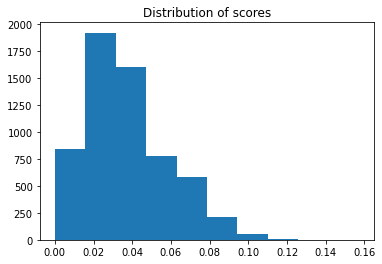

In [9]:
plt.hist(scores)
plt.title('Distribution of scores')

In [10]:
df[df['videoid'].isin(fnames)].groupby('channelTitle')['commentsToViewsRatio'].mean()

channelTitle
Chess School                 0.056407
Chess.com                    0.019610
agadmator's Chess Channel    0.033090
Name: commentsToViewsRatio, dtype: float64

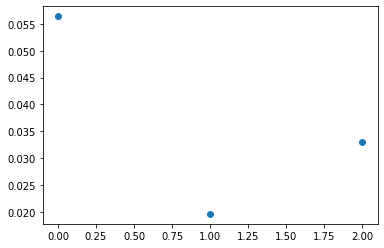

In [11]:
plt.scatter([0, 1, 2], [0.056407, 0.019610, 0.033090 ])

#### Can we bring the scores to 0-1 scale?

In [9]:
pfiles = os.listdir(path + 'pitches/')
pitches_data = []
for file in pfiles:
    pitches_data.append(np.load(path + 'pitches/' + file))

KeyboardInterrupt: 

In [5]:
pfiles = os.listdir(path + 'pitches/')
pdata = np.load(path + 'pitches/' + pfiles[0])

In [7]:
pdata

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
rfiles = os.listdir(path + 'rmse/')
rmse_data = []
for file in rfiles:
    rmse_data.append(np.load(path + 'rmse/' + file))

In [13]:
rmse_data

[array([2.2226191e-04, 2.1440882e-04, 3.2972830e-04, ..., 7.5123193e-05,
        7.6337899e-05, 7.3103423e-05], dtype=float32),
 array([0.00022226, 0.00021441, 0.00032973, ..., 0.09419094, 0.11958973,
        0.12551899], dtype=float32),
 array([0.00045275, 0.0011127 , 0.00149121, ..., 0.00662897, 0.00712838,
        0.00824196], dtype=float32),
 array([0.00224667, 0.00390762, 0.00421448, ..., 0.01246954, 0.01090515,
        0.01208729], dtype=float32),
 array([0.00098143, 0.00087856, 0.00098269, ..., 0.04729391, 0.0372611 ,
        0.03443051], dtype=float32),
 array([0.00020457, 0.00036329, 0.00052926, ..., 0.05166001, 0.07022165,
        0.07128166], dtype=float32),
 array([0.0000000e+00, 5.1946256e-07, 1.5652212e-06, ..., 4.9932733e-02,
        2.2772474e-02, 1.6412217e-02], dtype=float32),
 array([0.00126316, 0.00133769, 0.00155979, ..., 0.01359057, 0.0092543 ,
        0.00686164], dtype=float32),
 array([0.0000000e+00, 5.3024570e-07, 1.0645023e-06, ..., 6.8038821e-02,
        6.1

In [14]:
rmse_arr = np.vstack(rmse_data)

In [15]:
rmse_arr.shape

(6017, 9376)

In [16]:
rmse_mean = np.mean(rmse_arr, axis=1)

In [17]:
rmse_mean.shape

(6017,)

Text(0.5, 1.0, 'Distribution of RMS Intensity')

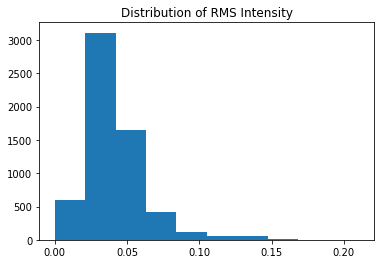

In [18]:
plt.hist(rmse_mean)
plt.title('Distribution of RMS Intensity')

In [19]:
rmse_mean.shape

(6017,)

In [20]:
len(scores)

6017

Text(0.5, 1.0, 'Relationship between scores and RMS Intensity')

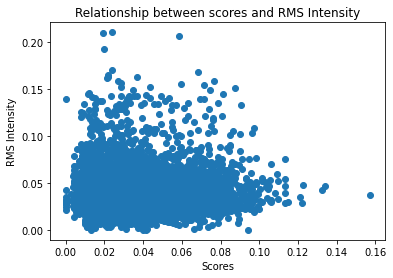

In [21]:
plt.scatter(scores, rmse_mean)
plt.xlabel('Scores')
plt.ylabel('RMS Intensity')
plt.title('Relationship between scores and RMS Intensity')

There doesn't seem to be any pattern or relation between the scores and RMS intensity values. 
Try outlier filtering

In [22]:
vcfiles = os.listdir(path + 'vc/')
vc_data = []
for file in vcfiles:
    vc_data.append(np.load(path + 'vc/' + file))
    

In [23]:
sizes = []
for i in vc_data:
    sizes.append(i.shape[0])
sizes

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [24]:
vc = map(lambda x:vc_data[x], list(np.where(np.array(sizes)==5)[0]))
vc_arr = np.vstack(vc)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [25]:
vc_arr

array([[2.99034979e+02, 2.40657859e+00, 4.17978881e+00, 2.39246537e-01,
        2.10000000e+01],
       [2.98954979e+02, 2.76989863e+00, 4.43001535e+00, 2.25732852e-01,
        1.70000000e+01],
       [2.95750138e+02, 4.02628717e+00, 4.59207094e+00, 2.17766671e-01,
        0.00000000e+00],
       ...,
       [2.98374138e+02, 2.54309363e+00, 3.11675191e+00, 3.20846839e-01,
        8.00000000e+00],
       [2.98870138e+02, 2.68974648e+00, 4.32368978e+00, 2.31283938e-01,
        2.30000000e+01],
       [2.96422138e+02, 2.50309740e+00, 3.90028284e+00, 2.56391662e-01,
        3.60000000e+01]])

In [29]:
files

NameError: name 'files' is not defined

In [26]:
vc_df = pd.DataFrame( vc_arr, columns=['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount'])

In [27]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount
0,299.034979,2.406579,4.179789,0.239247,21.0
1,298.954979,2.769899,4.430015,0.225733,17.0
2,295.750138,4.026287,4.592071,0.217767,0.0
3,298.988277,2.989718,4.543379,0.220100,6.0
4,296.357490,4.269844,4.751105,0.210477,2.0
...,...,...,...,...,...
6008,297.781490,4.083184,4.672238,0.214030,17.0
6009,298.838138,2.433104,4.251153,0.235230,8.0
6010,298.374138,2.543094,3.116752,0.320847,8.0
6011,298.870138,2.689746,4.323690,0.231284,23.0


In [30]:
files = [f.replace('.npy', '') for f in rfiles] 

In [35]:
files.sort()
files

['-0cvmd4UoYY',
 '-0gRIj0vkIU',
 '-18a84JHLdo',
 '-1EV8tt20hg',
 '-1mropfKtEw',
 '-2-lW9rYmh4',
 '-2Q2OHFZXWg',
 '-3otg-asbvc',
 '-4zG5MwvJXU',
 '-52He4PF-NA',
 '-5D2tjLVp48',
 '-5IoH91GAzA',
 '-5u5uuMdAJc',
 '-6QX53BmDbg',
 '-6hO5K0m16Y',
 '-6kZWBE2jdw',
 '-6vZkBxckU0',
 '-7PI9Q9uoSE',
 '-7VLF0XQghw',
 '-81MwXjQhZA',
 '-8Un1-oS4_A',
 '-8hZeVtAGhc',
 '-9NIze9FCIA',
 '-9PMGdZYZFA',
 '-9cCbATiUTQ',
 '-AaAqhgqZbs',
 '-BkW9a150wk',
 '-BwjT9Cvp18',
 '-BzocnDPuIs',
 '-CDQH2XHzJM',
 '-CoYV4tVouk',
 '-CyvFxV_ONE',
 '-D0gznjeySE',
 '-DFX-x_Q_LQ',
 '-EDzMUhSBXw',
 '-Eco8zfPvhI',
 '-En_grRzx3g',
 '-GEsoR1Owoc',
 '-GYrlMBb2hs',
 '-GpYhKU1iGs',
 '-Hwx8QQQyQ8',
 '-HyL_zMmaGI',
 '-JQQt8XG0iA',
 '-JfkU8dnjHI',
 '-JfqhOaXjVg',
 '-NozSoqprUM',
 '-O4L1Jn5vT8',
 '-OOwx7Q4q0U',
 '-O_9OMk2Qz8',
 '-Q48ab6q1Qs',
 '-Qi_f_tOmS4',
 '-QxhynY7Cyg',
 '-UNGDPtsEeg',
 '-UdpVy1aft0',
 '-W1cNB7LO0E',
 '-WXEeY-VO8U',
 '-WuYsCApZXo',
 '-YA5YsW_-kI',
 '-ZNS8LP_0Mg',
 '-ZSHtlS3ABY',
 '-ZWGaSGPRH8',
 '-ZxQABkfSU0',
 '-_W8jb

In [36]:
files[3412]

'ZLLMaQQKdfg'

In [38]:
files[3341]

'Ybmhn-2mNTA'

In [29]:
files = list(np.array(files)[np.where(np.array(sizes)==5)[0]])

In [30]:
vc_df['filenames'] = files

In [31]:
list(rmse_mean[np.where(np.array(sizes)==5)[0]])

[0.038176112,
 0.049182665,
 0.035085134,
 0.02126067,
 0.035646953,
 0.04513863,
 0.047888305,
 0.05346088,
 0.08023069,
 0.031998374,
 0.020401752,
 0.044345226,
 0.05281404,
 0.042298824,
 0.073453054,
 0.043515943,
 0.013419551,
 0.052671686,
 0.037144445,
 0.076302305,
 0.067791075,
 0.04209484,
 0.02321753,
 0.019892499,
 0.0334441,
 0.041170396,
 0.032908022,
 0.028742267,
 0.044553954,
 0.024932701,
 0.07156161,
 0.015377199,
 0.043001745,
 0.036082067,
 0.037302945,
 0.029069204,
 0.03379572,
 0.034139514,
 0.04541751,
 0.015620892,
 0.022503475,
 0.023814581,
 0.025841527,
 0.049355593,
 0.023180436,
 0.054774377,
 0.030983033,
 0.035170257,
 0.03984827,
 0.04068872,
 0.03635065,
 0.032389633,
 0.038053654,
 0.029267864,
 0.05541482,
 0.032473013,
 0.026962316,
 0.043767974,
 0.03364421,
 0.005958251,
 0.041327577,
 0.016454054,
 0.036938243,
 0.051666465,
 0.027465058,
 0.054340426,
 0.04347162,
 0.023941975,
 0.03249522,
 0.06718086,
 0.043977827,
 0.04715929,
 0.019708583,

In [32]:
df

,videoid,videoTitle,videoPublishedDate,videoDescription,videoLikeCount,videoDislikeCount,videoViewCount,videoCommentCount,channelID,channelTitle,channelPublishedAt,channelDescription,channelRegionCode,videoCount,channelViewCount,subscriberCount,channelLiveBroadcastContent,videoPublishedYear,commentsToViewsRatio
0,pinaucMst7I,Fischer Random Streamer Battle! | Arena Kings,2021-02-05,"With new year, Chess.com is bringing back an e...",266,8,14126,9,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.020034
1,flS8iUrCW6A,Charlie Finds Out The 'Engine' Was Hikaru,2021-02-05,@penguinz0 thought he was playing against some...,2222,29,40817,66,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.056766
2,6vDFPFsMTpw,Greg Shahade vs Kostya Kavutskiy | I'm Not a G...,2021-02-04,IM Not A GM is back with the quarterfinals!. T...,784,21,55569,20,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.014846
3,SbYyRFCXWZQ,Janowski Hangs His Queen On Purpose...And Wins,2021-02-04,Join WFM Alessia Santeramo as she breaks down ...,273,16,6982,33,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.046119
4,gpllAezf53E,Roberto Molina vs Lawrence Trent | I'm Not a G...,2021-02-03,IM Not A GM is back with the quarterfinals!. T...,1009,17,63439,33,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.016693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,JwoYK1bQRRE,Brilliancy by Greco,2011-04-01,World's Best Chess Miniatures\nOwen Defence\nG...,489,4,15421,17,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.033072
8158,ZDAsxnee_9U,Amazing chess game known as: The skewer lure,2011-04-01,World's Best Chess Miniatures\nAndrews vs Jass...,4205,33,209833,281,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.021536
8159,__lxgA7xvJI,Naval intelligence,2011-04-01,World's Best Chess Miniatures\nCaptain William...,1766,19,89509,51,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.020512
8160,IzSeJ5Vi-o8,Crashing attack by Bill Wall,2011-04-01,World's Best Chess Miniatures\nBird Opening: F...,833,14,47326,32,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.018573


In [33]:
vc_df['rms_intensity'] = list(rmse_mean[np.where(np.array(sizes)==5)[0]])

In [34]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount,filenames,rms_intensity
0,299.034979,2.406579,4.179789,0.239247,21.0,Mn2AuFd-IgY,0.038176
1,298.954979,2.769899,4.430015,0.225733,17.0,f3sYaKK-mHk,0.049183
2,295.750138,4.026287,4.592071,0.217767,0.0,aPEU3NXxI7s,0.035085
3,298.988277,2.989718,4.543379,0.220100,6.0,1lOlN16Ary4,0.021261
4,296.357490,4.269844,4.751105,0.210477,2.0,403EYdt3MuU,0.035647
...,...,...,...,...,...,...,...
6008,297.781490,4.083184,4.672238,0.214030,17.0,gTqvXodLMCE,0.033497
6009,298.838138,2.433104,4.251153,0.235230,8.0,4EQqw2VpAr4,0.026789
6010,298.374138,2.543094,3.116752,0.320847,8.0,VlEFsZ_knZ8,0.054134
6011,298.870138,2.689746,4.323690,0.231284,23.0,lNLJl7msFLo,0.030721


In [35]:
df = df.sort_values(by=['videoid'])
vc_df = vc_df.sort_values(by=['filenames'])

In [36]:
df.columns 

Index(['videoid', 'videoTitle', 'videoPublishedDate', 'videoDescription',
       'videoLikeCount', 'videoDislikeCount', 'videoViewCount',
       'videoCommentCount', 'channelID', 'channelTitle', 'channelPublishedAt',
       'channelDescription', 'channelRegionCode', 'videoCount',
       'channelViewCount', 'subscriberCount', 'channelLiveBroadcastContent',
       'videoPublishedYear', 'commentsToViewsRatio'],
      dtype='object')

In [37]:
vc_df['videoLikeCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoLikeCount']
vc_df['videoDislikeCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoDislikeCount']
vc_df['videoViewCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoViewCount']
vc_df['videoCommentCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoCommentCount']
vc_df['channelViewCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['channelViewCount']
vc_df['subscriberCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['subscriberCount']

In [38]:
vc_df['scores'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['commentsToViewsRatio']

In [39]:
vc_df.reset_index(drop=True, inplace=True)

In [40]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount,filenames,rms_intensity,videoLikeCount,videoDislikeCount,videoViewCount,videoCommentCount,channelViewCount,subscriberCount,scores
0,297.446138,1.649844,4.053452,0.246703,0.0,-0cvmd4UoYY,0.047703,2371,29,77461,165,393701197,998000,0.033113
1,296.294138,4.006289,4.748621,0.210587,2.0,-0gRIj0vkIU,0.042618,492,1,8825,40,89781697,147000,0.060397
2,296.405490,4.086517,4.474102,0.223509,3.0,-18a84JHLdo,0.020457,4157,56,187506,181,393701197,998000,0.023434
3,148.518138,3.263026,3.331243,0.300188,2.0,-1EV8tt20hg,0.033478,4145,62,162995,474,393701197,998000,0.028719
4,299.445490,4.386506,4.606376,0.217090,1.0,-1mropfKtEw,0.071849,70,2,6257,16,121653031,569000,0.014064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,298.246138,2.553093,3.391449,0.294859,9.0,zvbHHu1hezc,0.013938,1099,15,16952,137,89781697,147000,0.073797
6009,296.038138,3.569664,4.167505,0.239952,8.0,zwwd3YLT7DE,0.061865,232,6,16358,40,121653031,569000,0.016995
6010,299.750138,4.092948,4.502056,0.222121,2.0,zxzNReZDB84,0.049305,774,6,10454,32,89781697,147000,0.077674
6011,293.061490,4.206513,4.642343,0.215408,3.0,zygRli1vLuk,0.048650,973,10,22176,39,89781697,147000,0.046086


In [41]:
vc_df['speakingrate'].corr(vc_df['scores'])

-4.930598658494043e-05

In [42]:
norm_scores = (vc_df['scores'] - vc_df['scores'].min())/(vc_df['scores'].max() - vc_df['scores'].min())
vc_df['speakingrate'].corr(norm_scores)

-4.930598658494555e-05

In [43]:
norm_scores.describe()


count    6013.000000
mean        0.237969
std         0.134514
min         0.000000
25%         0.132209
50%         0.212395
75%         0.318486
max         1.000000
Name: scores, dtype: float64

In [44]:
vc_df.scores.describe()

count    6013.000000
mean        0.037422
std         0.021153
min         0.000000
25%         0.020790
50%         0.033400
75%         0.050084
max         0.157255
Name: scores, dtype: float64

In [46]:
vc_df.dtypes

pausedur             float64
speakingrate         float64
articulationrate     float64
asd                  float64
unvoicedcount        float64
filenames             object
rms_intensity        float64
videoLikeCount         int64
videoDislikeCount      int64
videoViewCount         int64
videoCommentCount      int64
channelViewCount       int64
subscriberCount        int64
scores               float64
dtype: object

<Figure size 1080x1080 with 0 Axes>

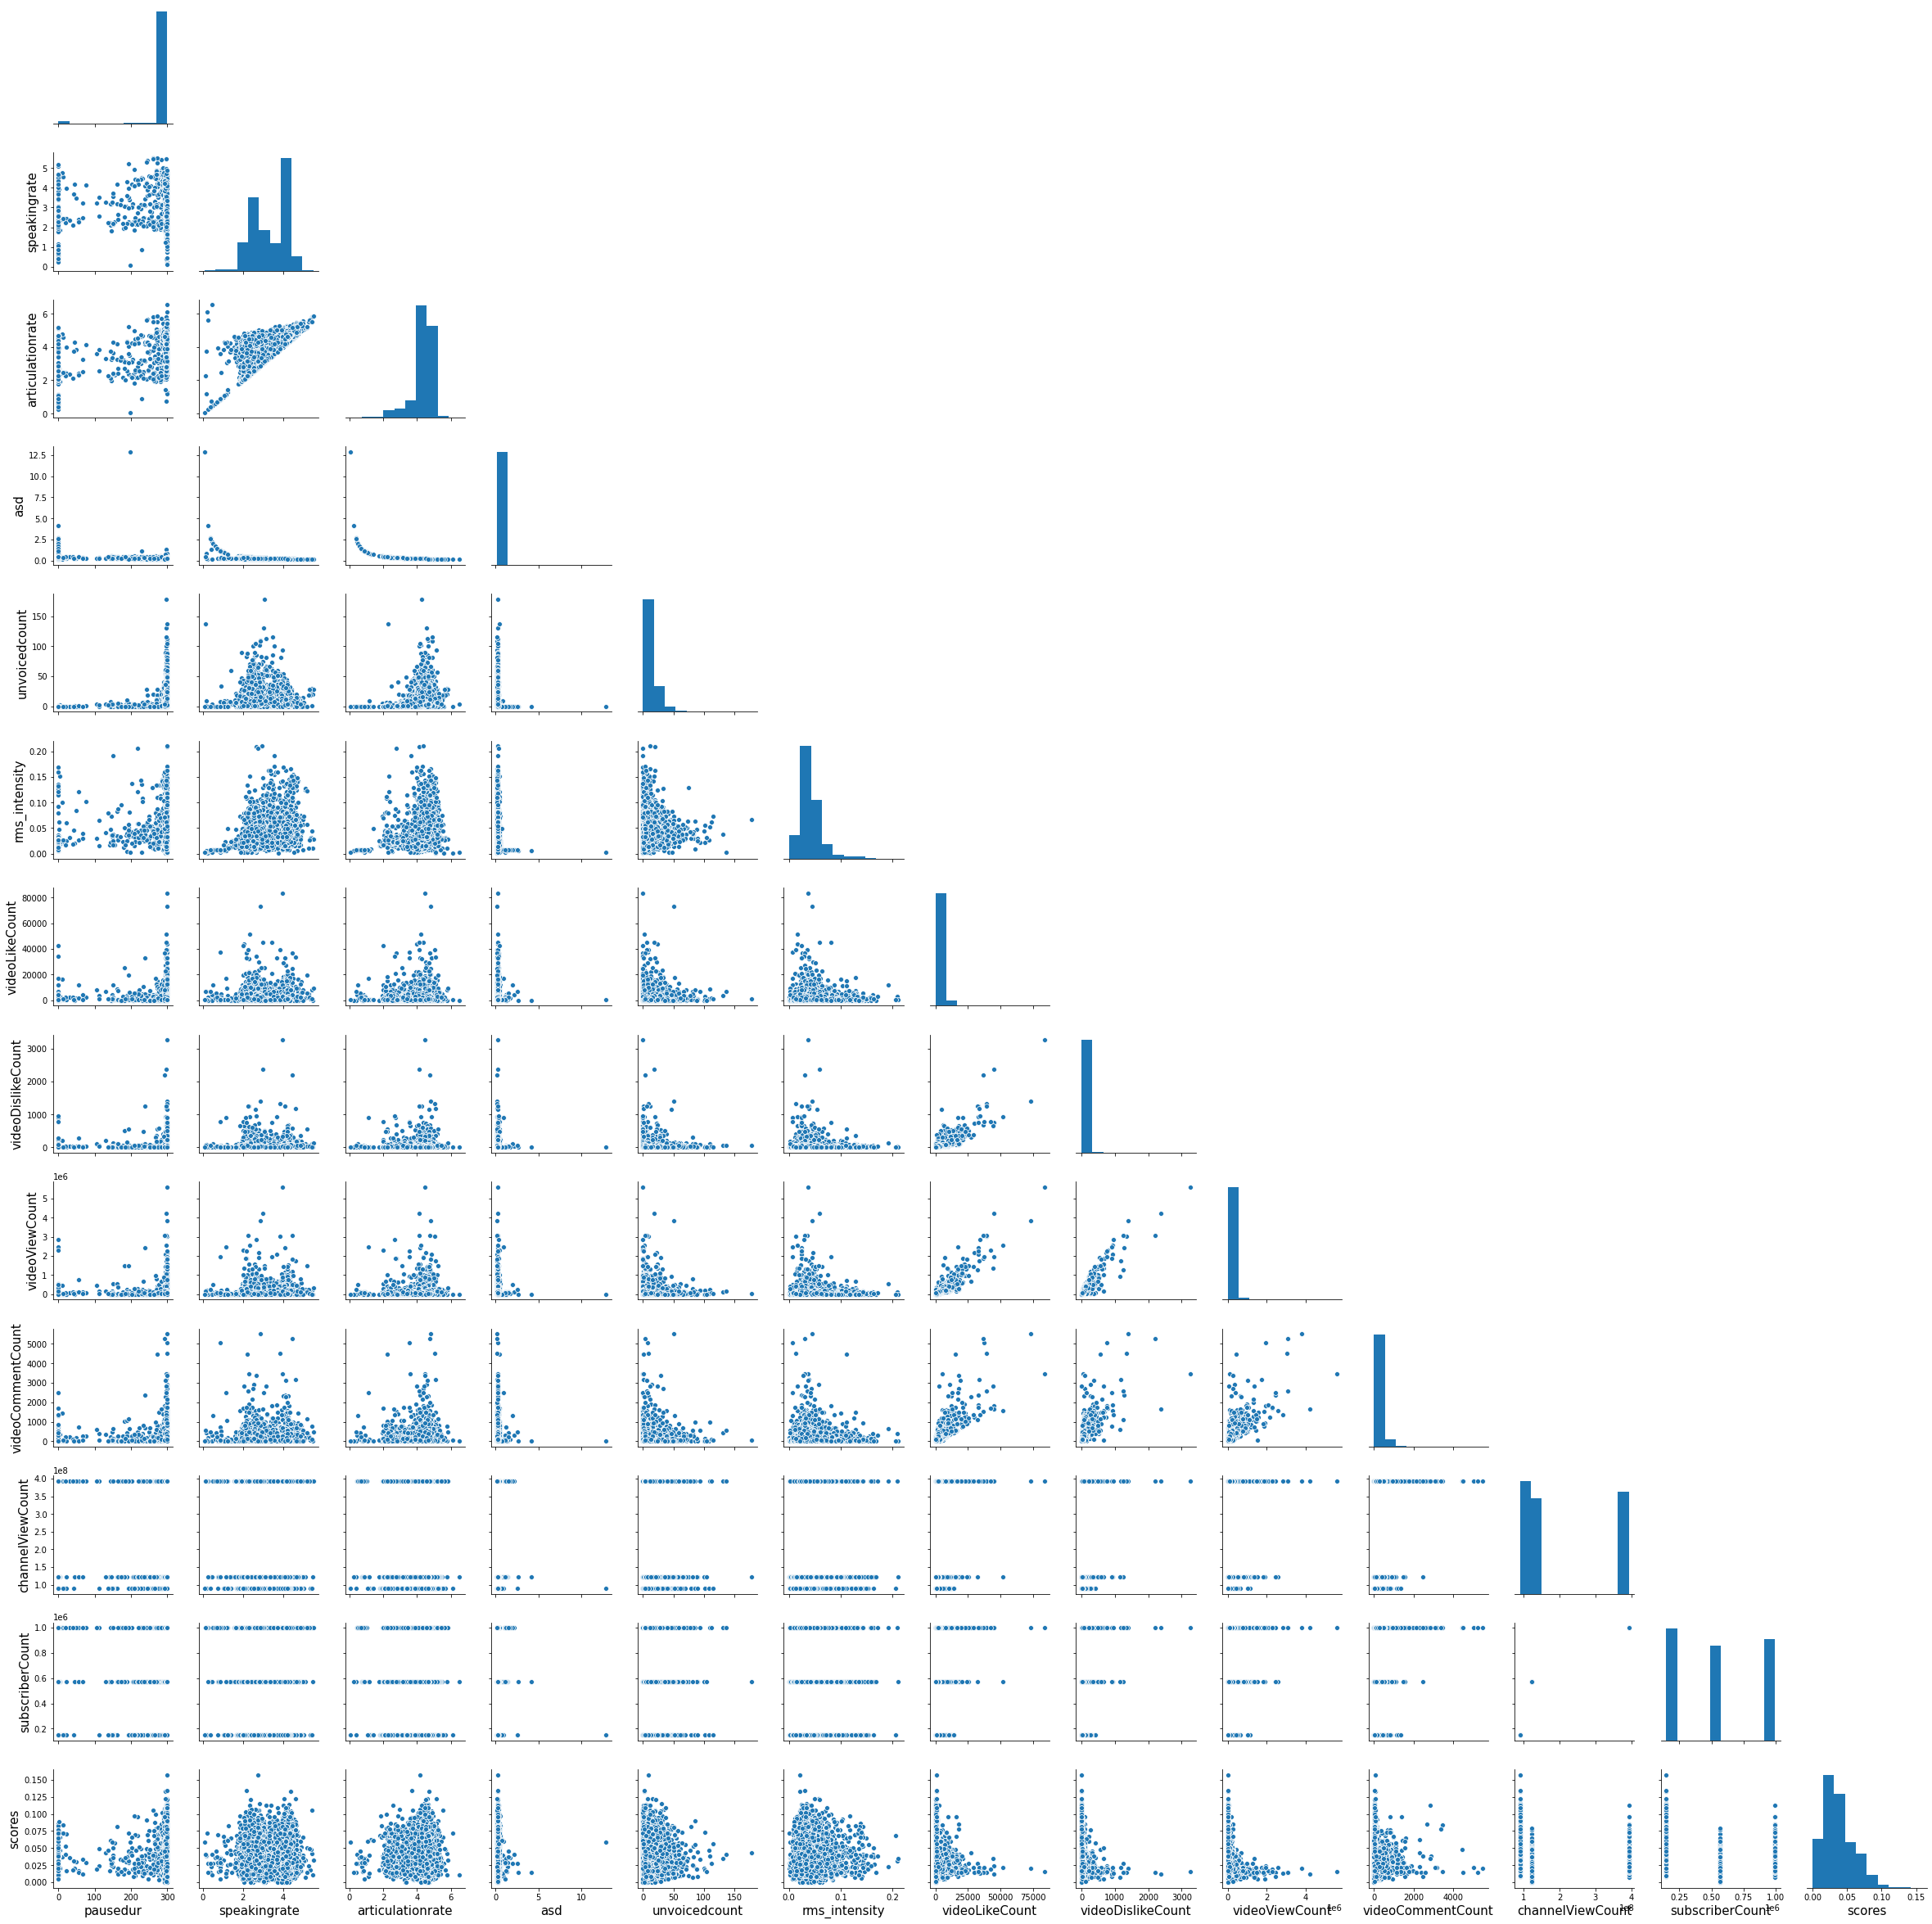

In [47]:
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.rcParams["axes.labelsize"] = 15

sns.pairplot(vc_df, corner=True)
# plt.xlabel(list(vc_df.columns), fontsize=30)
# plt.ylabel(list(vc_df.columns), fontsize=30)
# plt.savefig('pairplot_speech_features.png')

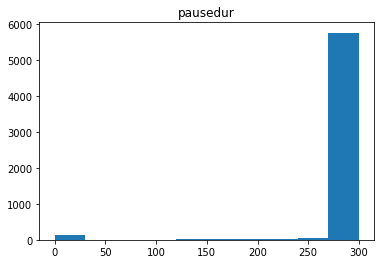

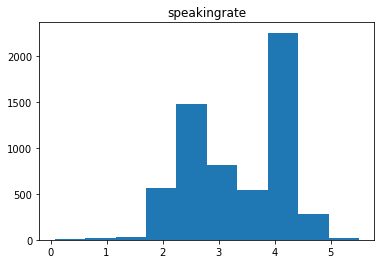

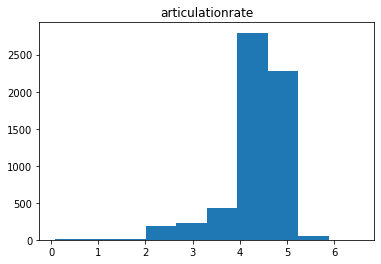

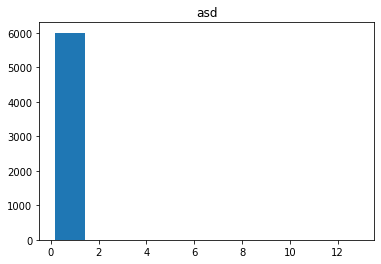

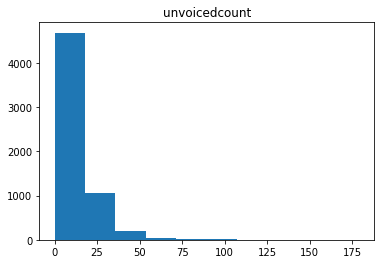

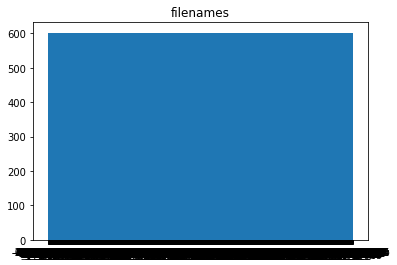

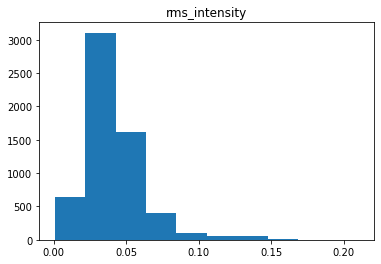

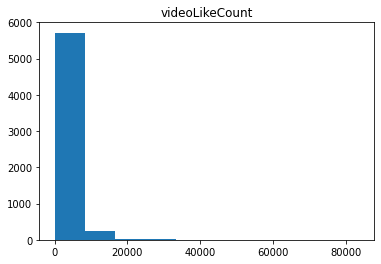

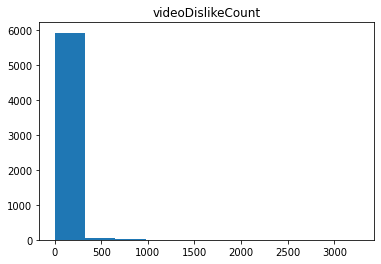

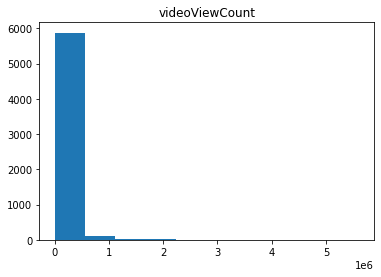

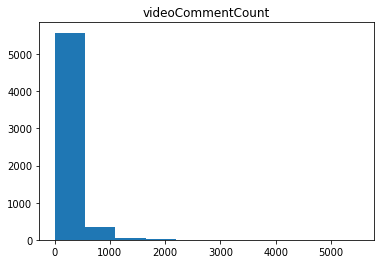

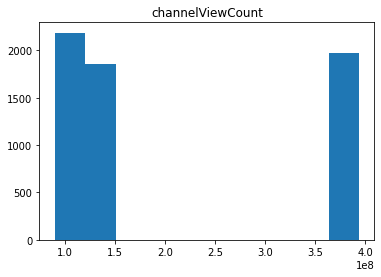

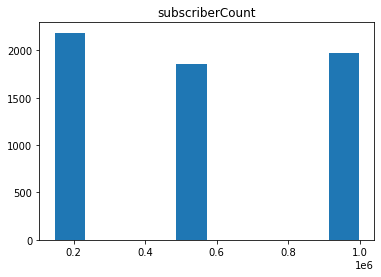

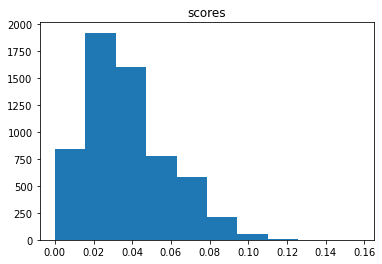

In [54]:
for feature in list(vc_df.columns):
    plt.hist(vc_df[feature])
    plt.title(feature)
    plt.show()
    

In [50]:
vc_df.columns

Index(['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'filenames', 'rms_intensity', 'videoLikeCount', 'videoDislikeCount',
       'videoViewCount', 'videoCommentCount', 'channelViewCount',
       'subscriberCount', 'scores'],
      dtype='object')

In [45]:
# !pip3 install pandas_profiling --user

In [64]:
from pandas_profiling import ProfileReport

In [65]:
profile = ProfileReport(vc_df, title="Pandas Profiling Report" )

In [66]:
profile.to_file('chess_features_analysis_new.pdf')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/home/mounika.k/.local/lib/python3.7/site-packages/pandas_profiling/profile_report.py:267: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]